# Instructions

* **The Goal**:
    * Complete code to fold the UUCG-tetraloop RNA (PDB: 2KOC), which has the sequence = 'GGCACUUCGGUGCC' and the P2a-J2a/b-P2b of human telomerase RNA (PDB: 2L3E), which has a sequence = 'GGCUUUUGCUCCCCGUGCUUCGGCACGGAAAAGCC' using simulated annealing.



* **Simulation**:
    1. Inspect the annealing_assignment.py and identify regions with the 'pass' statement.
    2. Added needed code. **The code you will need to add are essentially calls to functions defined in PyRNA.py. It is your job to figure out which functions to use.**
    3. Modify the simulated_annealing() function in annealing_assignment.py so that: 
        1. at each step cooling step, you can execute a number 'equilibration steps', i.e., a set of random moves (perturbations) at the given value of the distribution parameter.
        2. after each iteration the current state is saved to a list, by appending the state objects to the list.
    4. Run the simulation in this 'RNA_folding_assignment.ipynb' file.
   



* **Visualization**:
    * Using the states after each iteration to compute and visualize the base-pair probability matrix for each RNA based the results of 500 iterations.



* **Question**:
    * Are you result consistent with the solved NMR structures? You can access the secondary structures  using the PDB IDs using RNApdbee: http://rnapdbee.cs.put.poznan.pl/
    * **Answer this question in comment at the end of this 'RNA_folding_assignment.ipynb' file.**



* **How to submit**:
    * **Please rename this file as 'RNA_folding_assignment_firstname_lastname.ipynb' before you submit it to canvas.**
   


In [10]:
import network_line_graph as nlg

In [11]:
from annealing import *
from PyRNA import *

# dictionary to store results
results = {}

## UUCG tetraloop

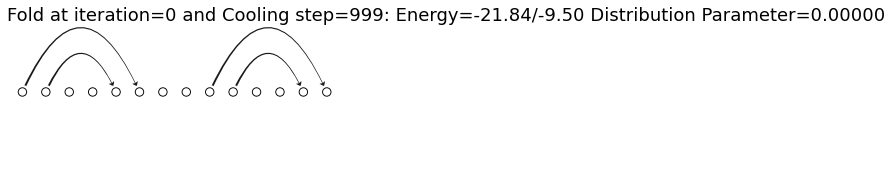

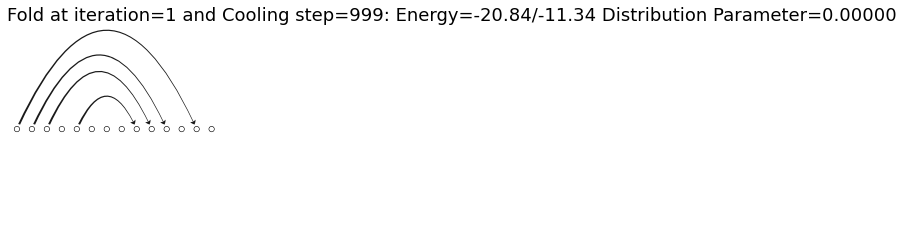

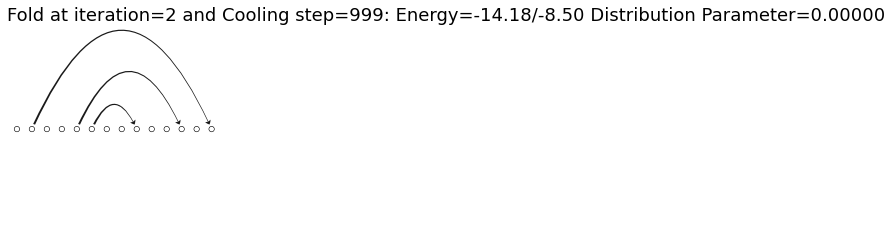

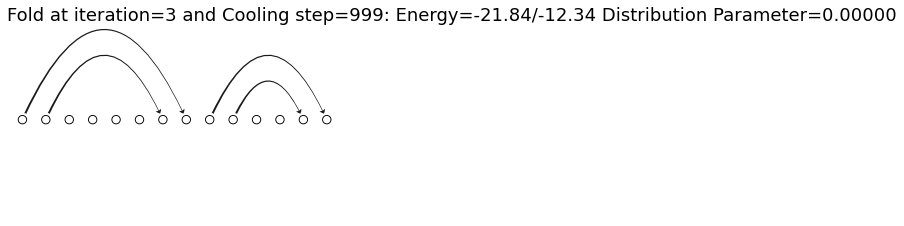

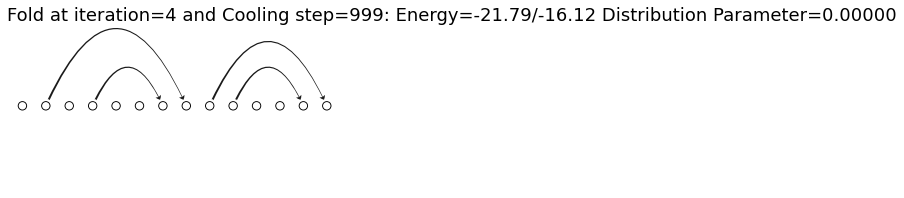

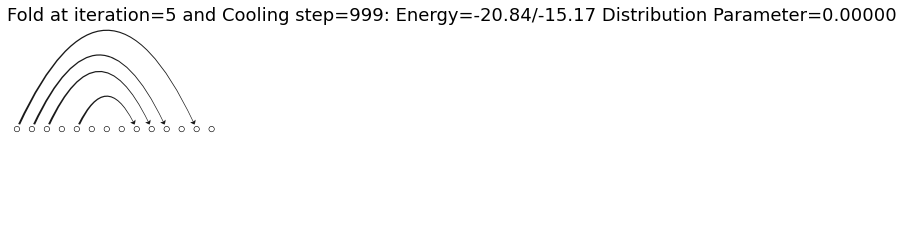

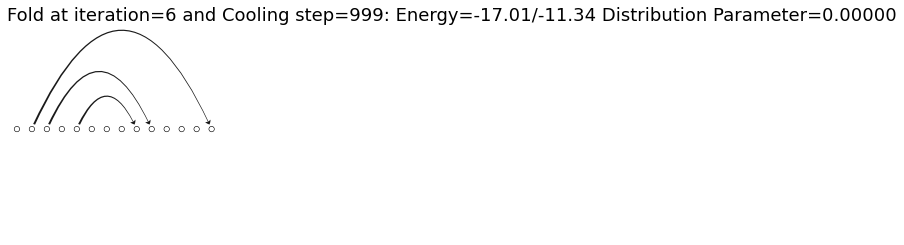

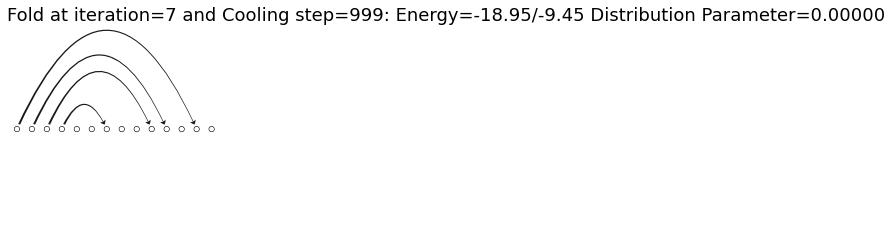

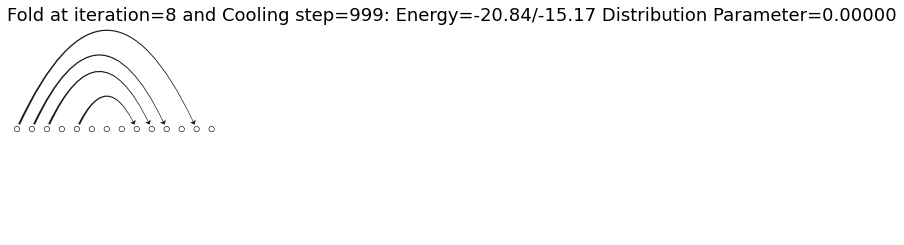

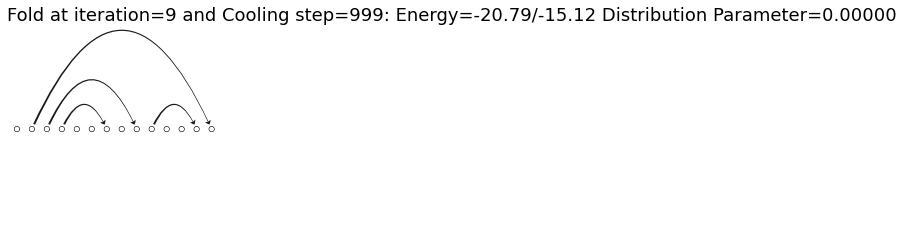

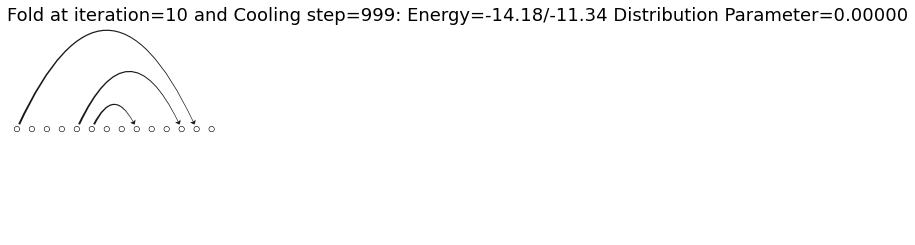

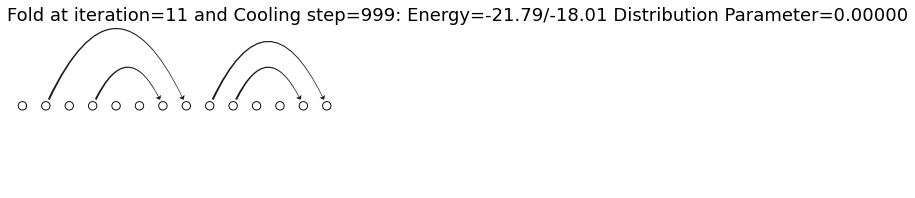

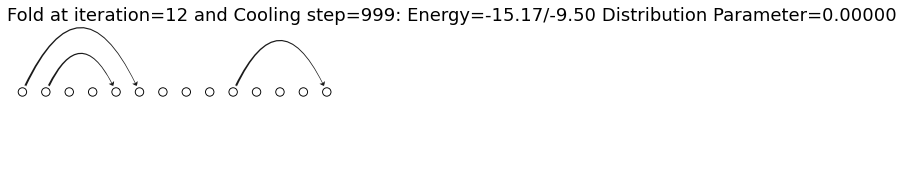

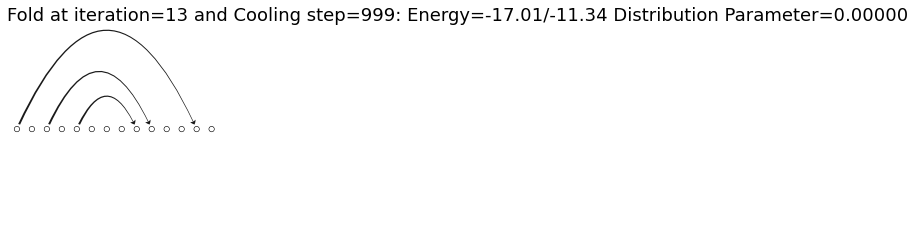

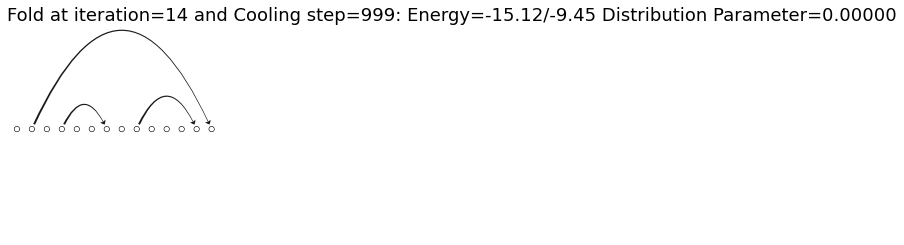

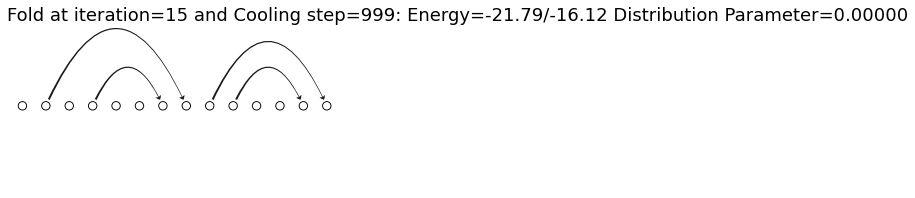

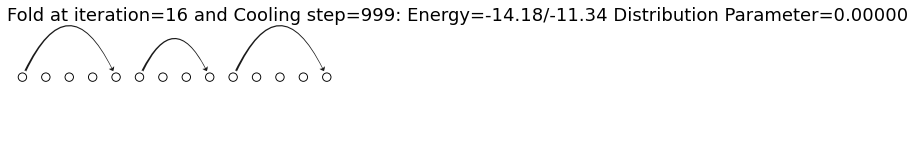

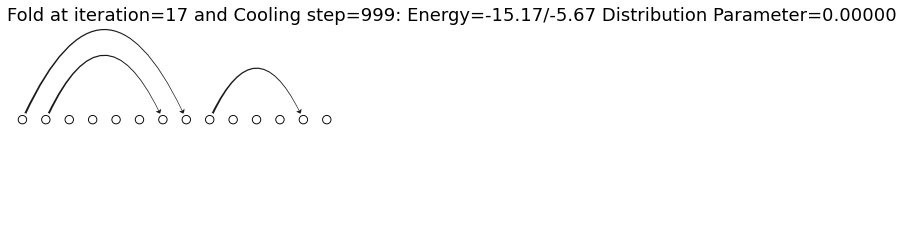

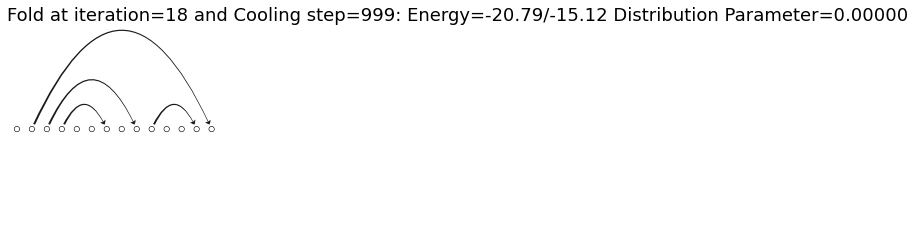

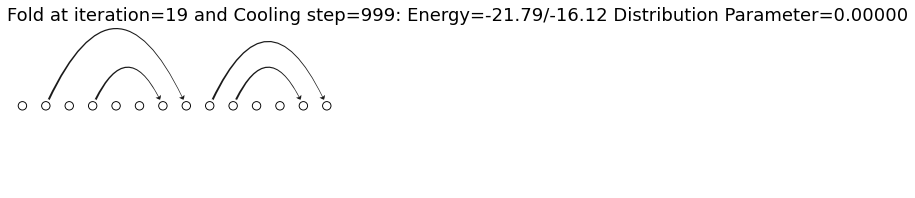

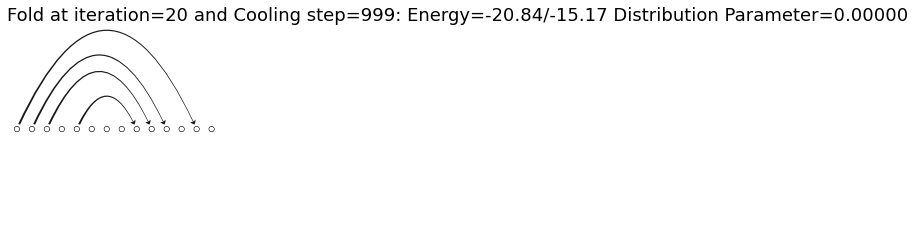

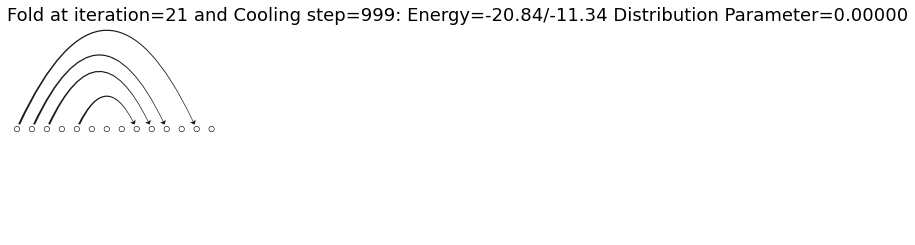

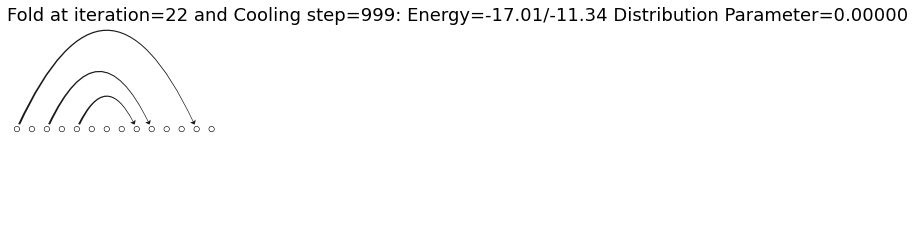

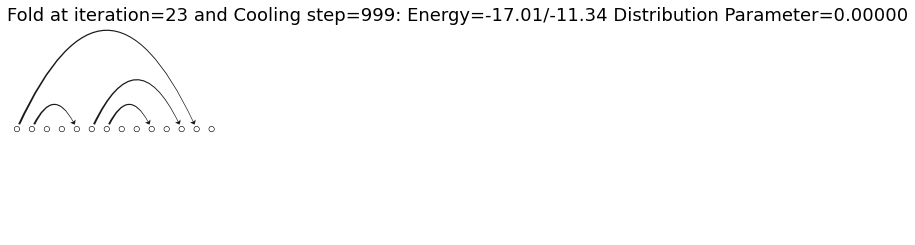

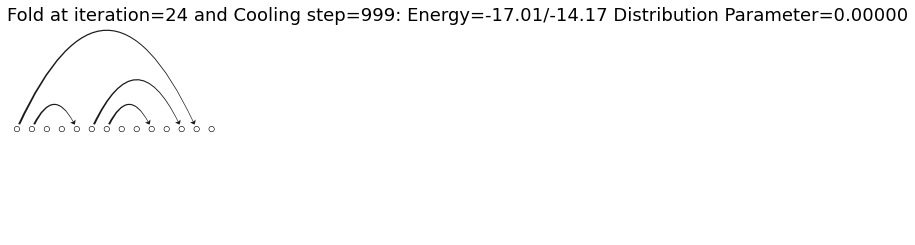

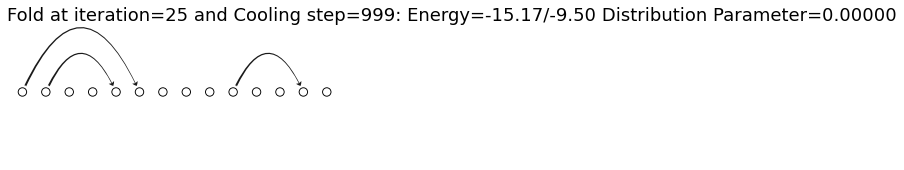

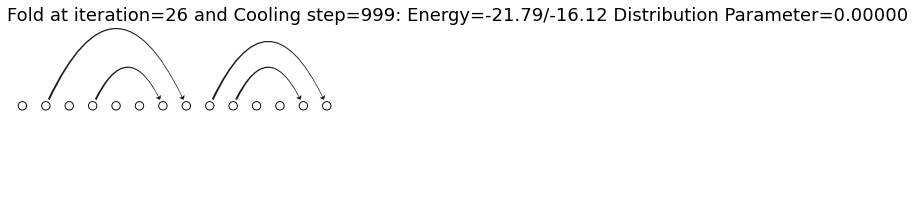

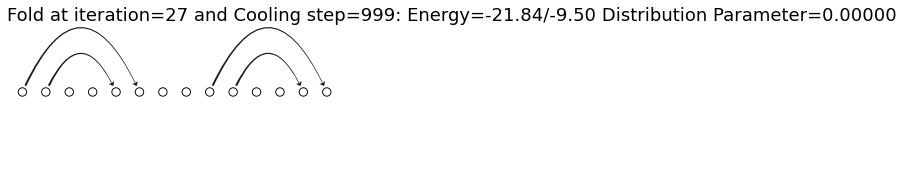

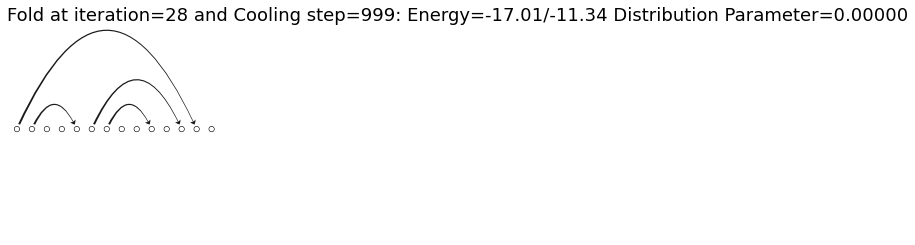

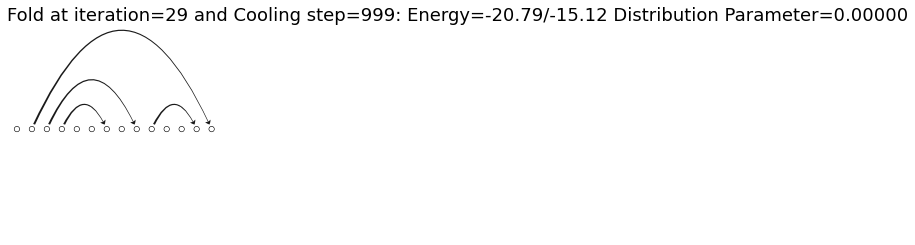

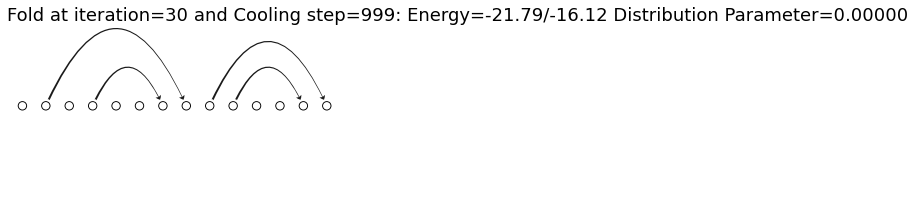

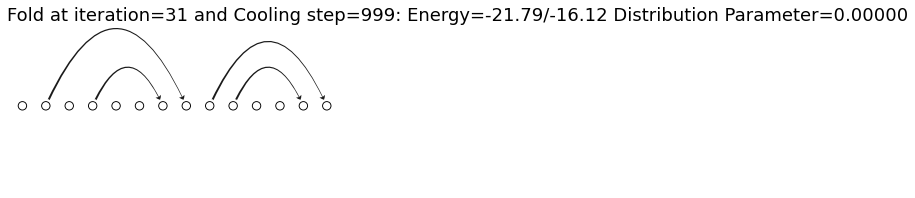

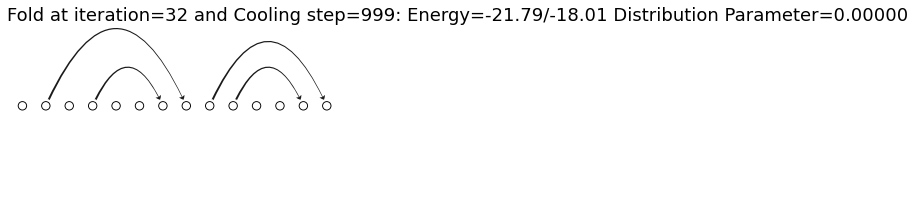

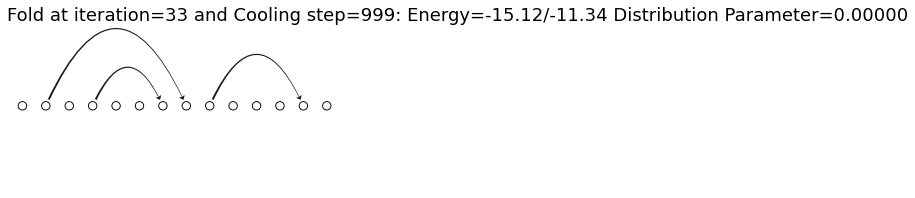

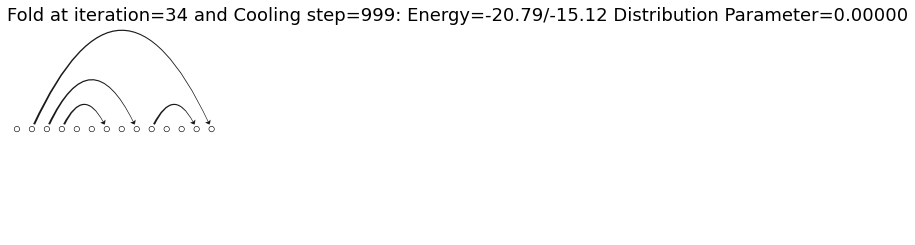

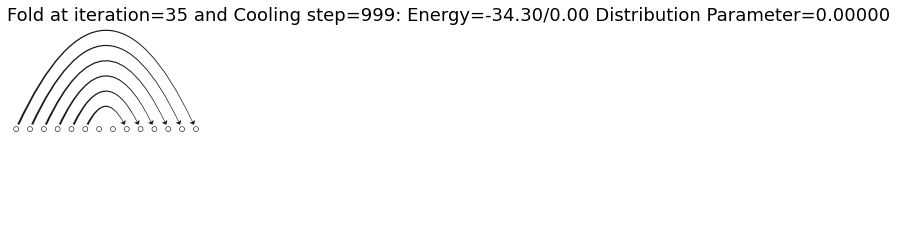

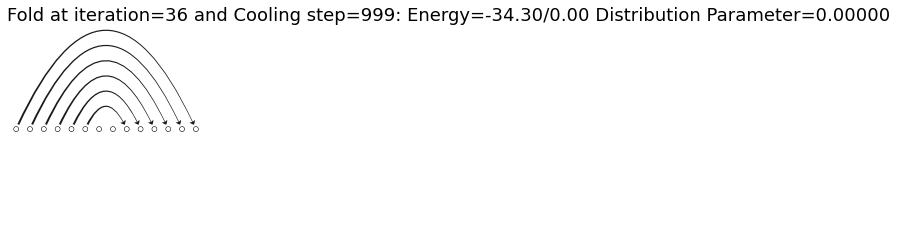

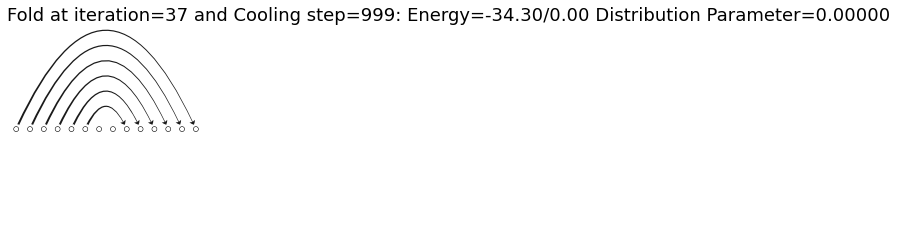

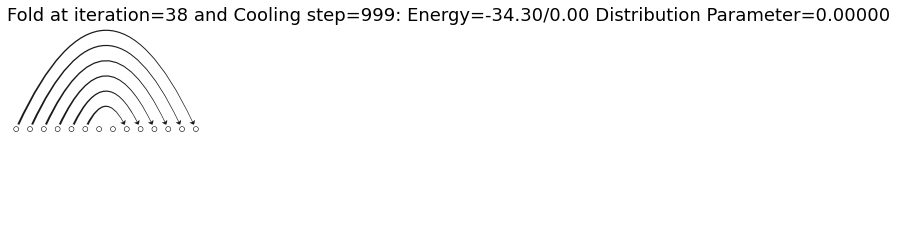

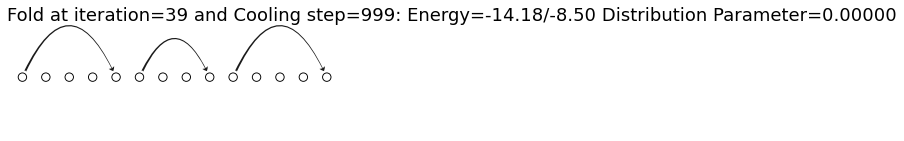

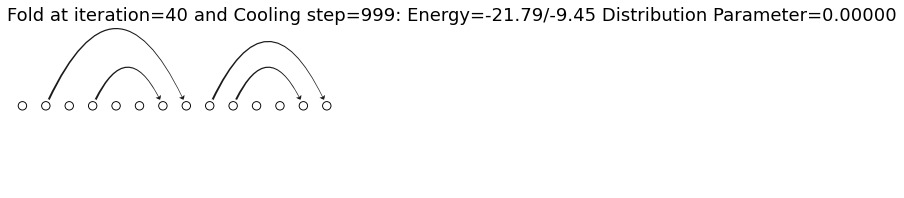

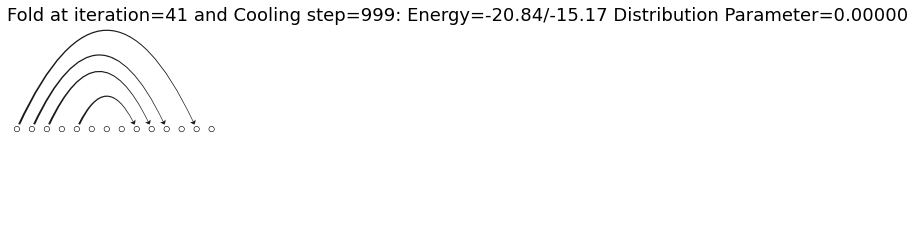

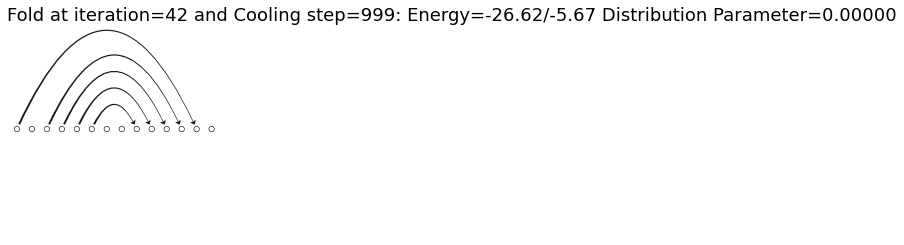

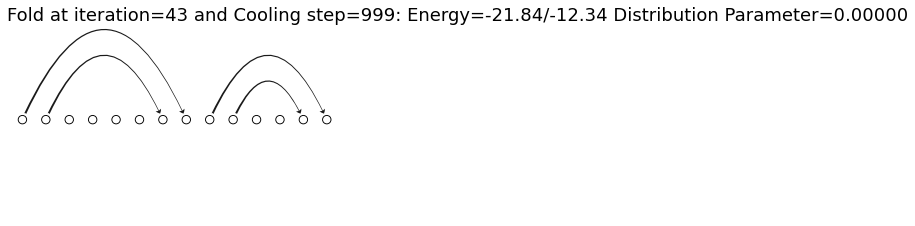

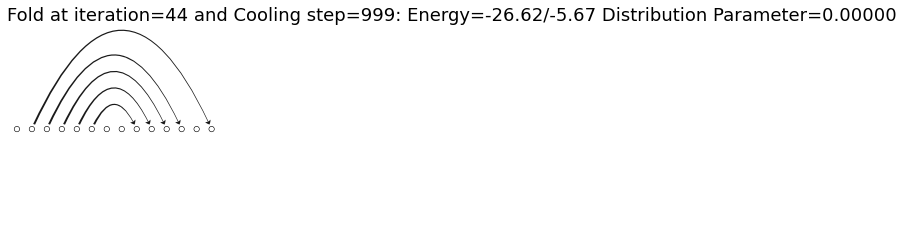

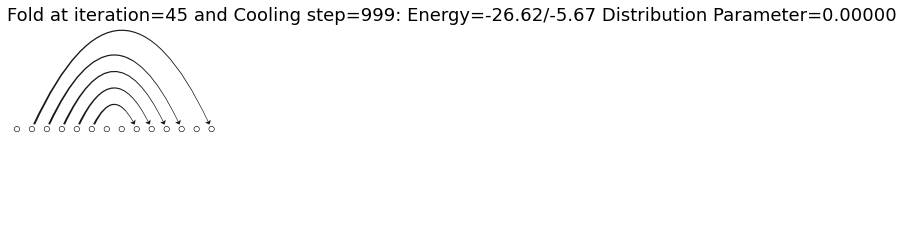

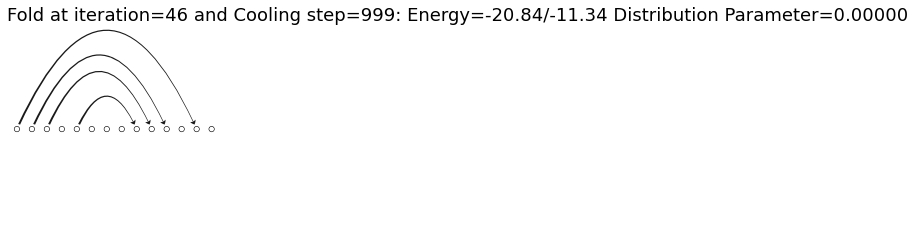

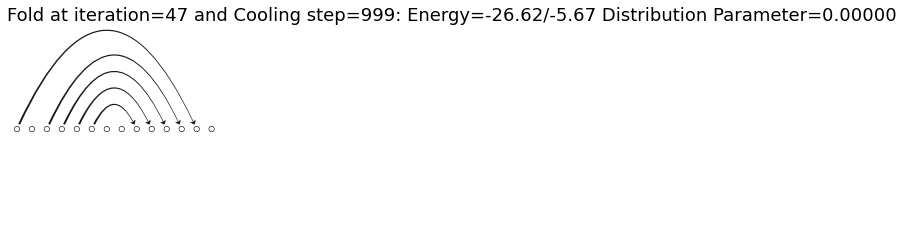

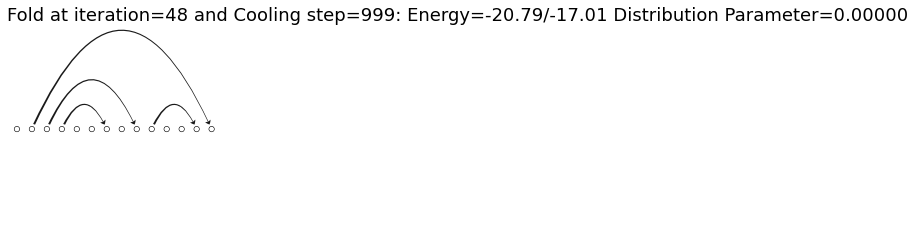

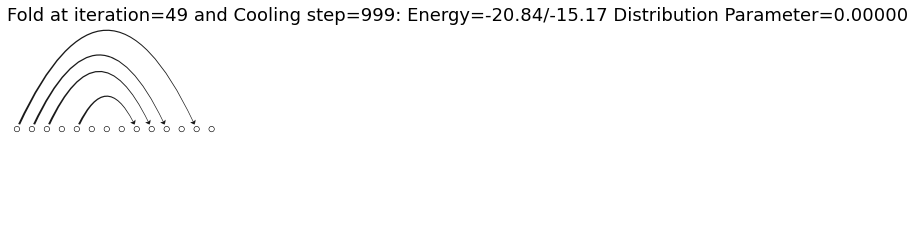

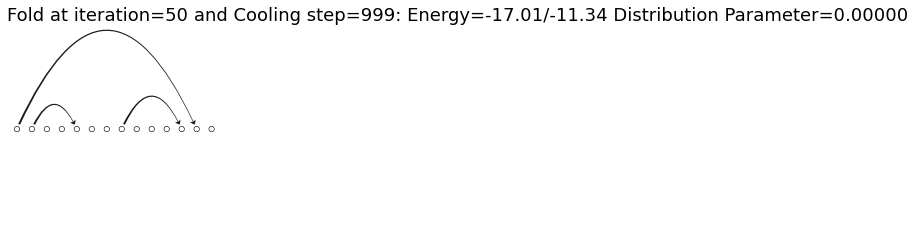

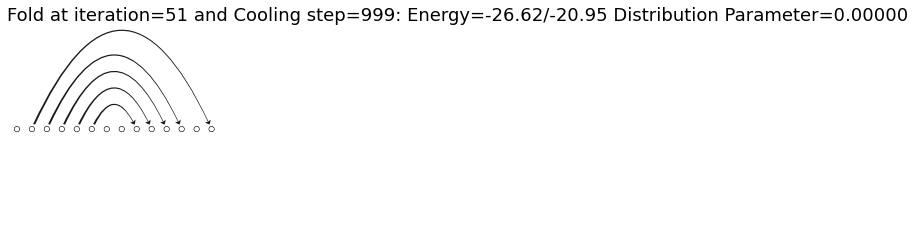

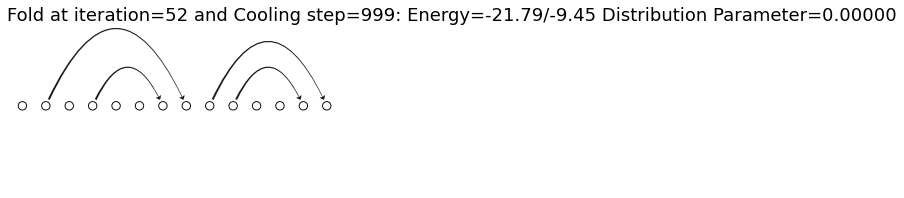

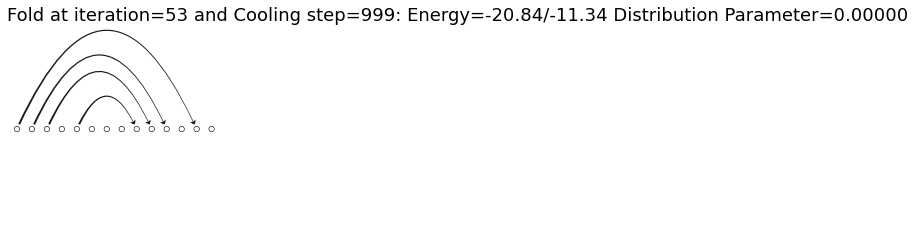

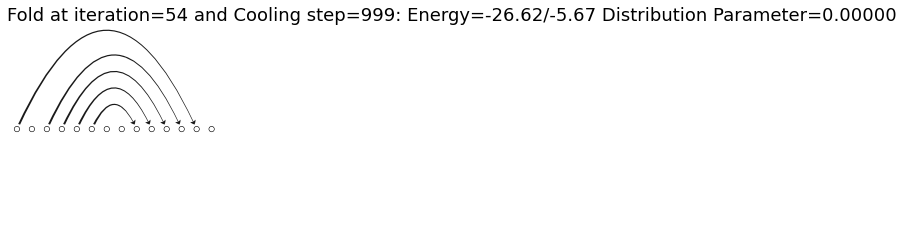

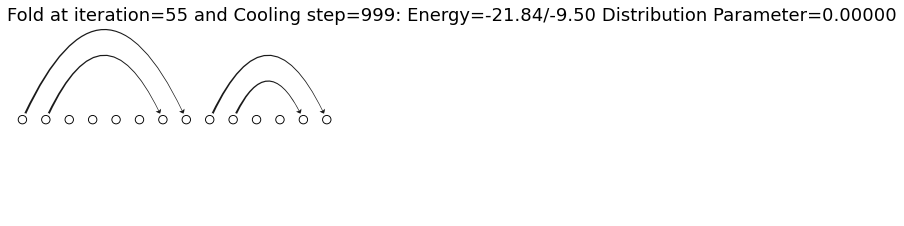

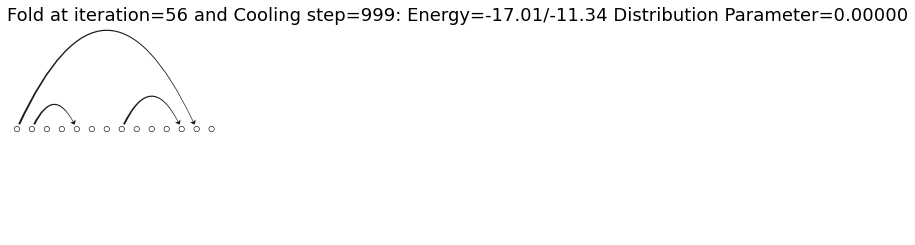

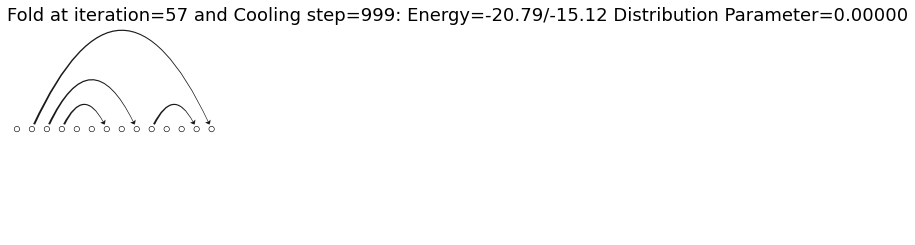

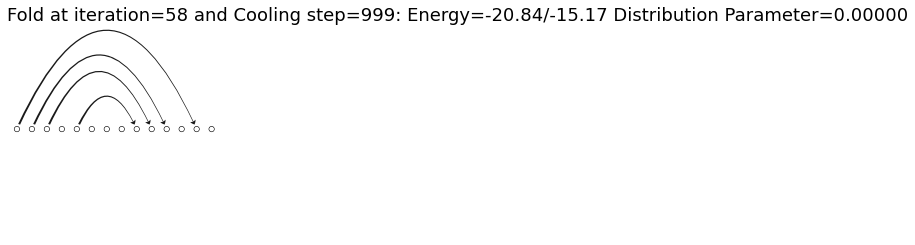

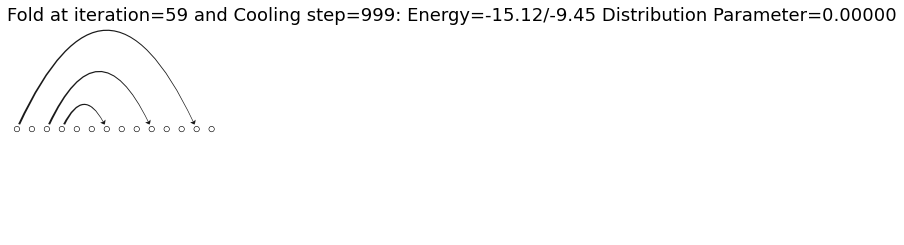

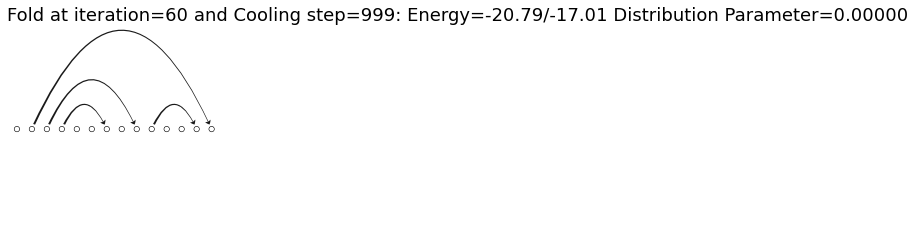

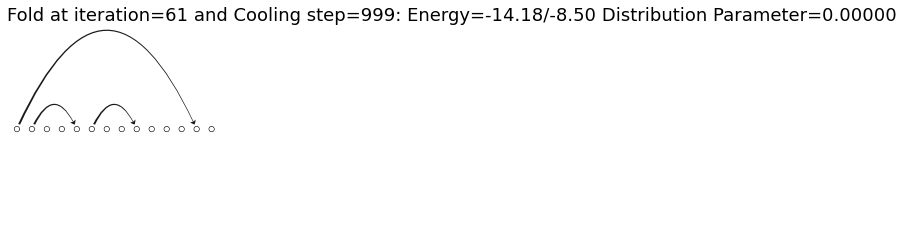

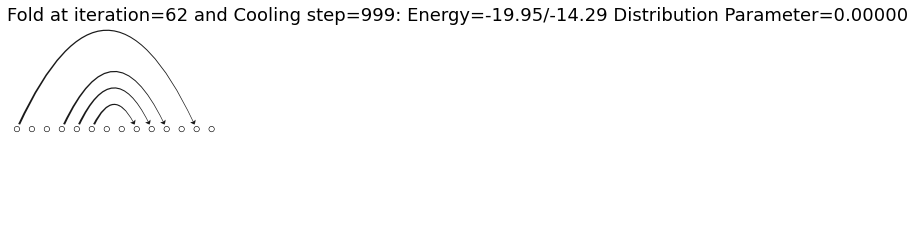

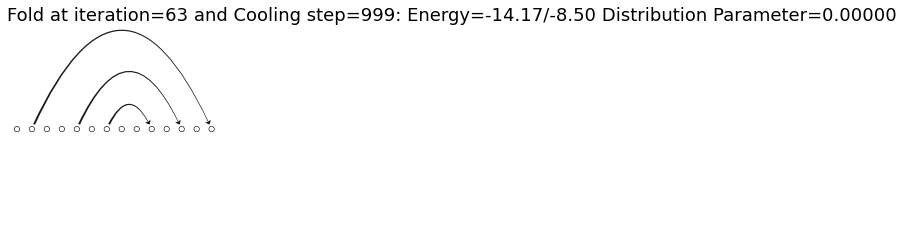

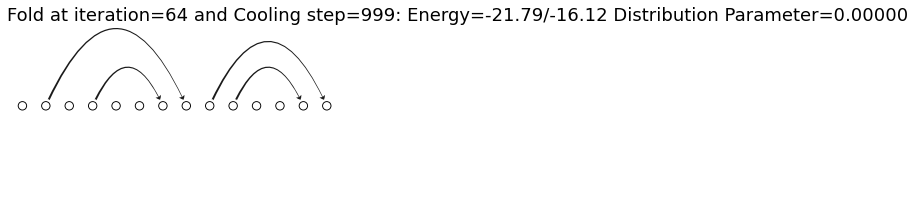

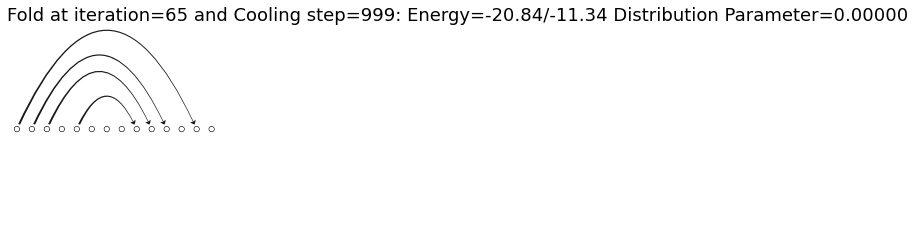

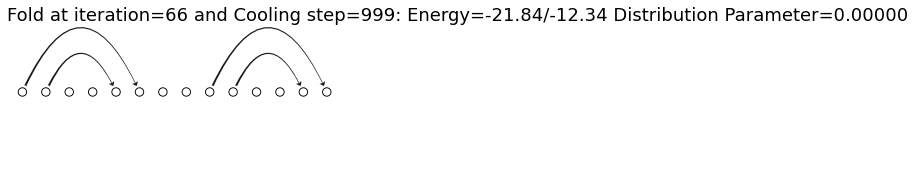

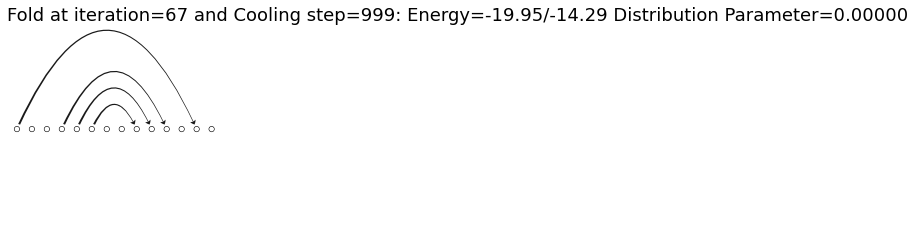

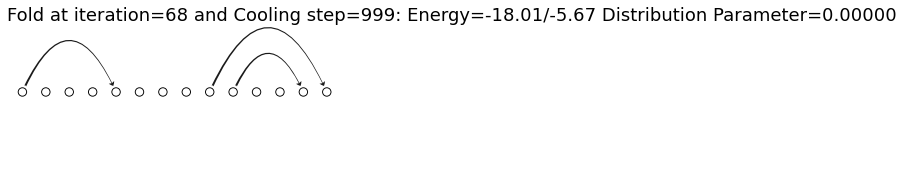

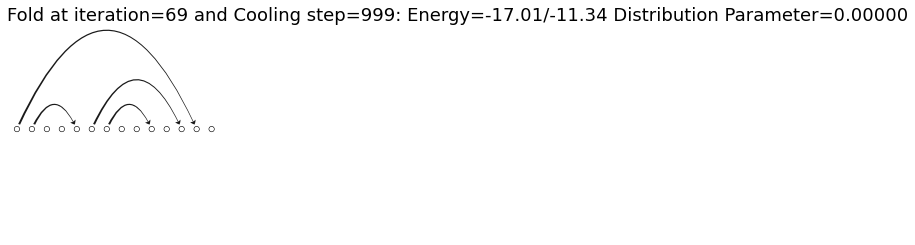

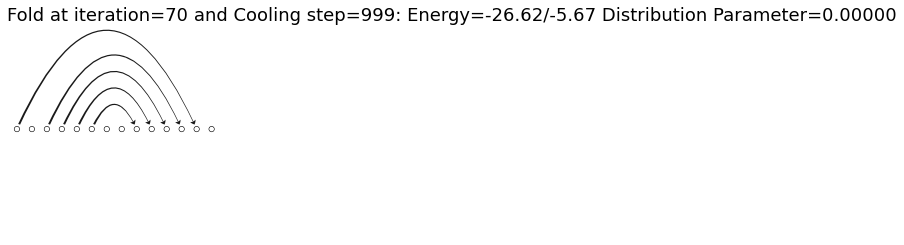

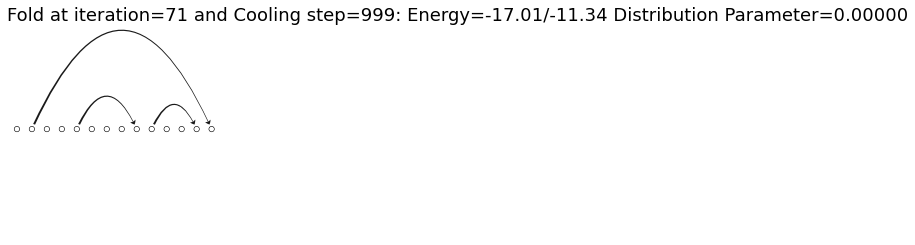

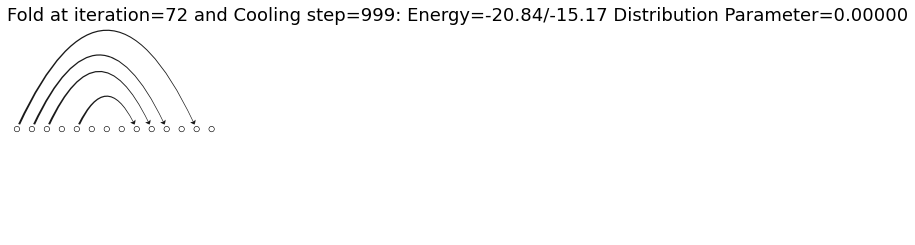

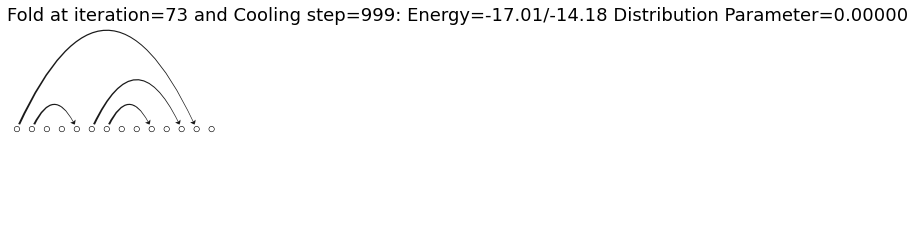

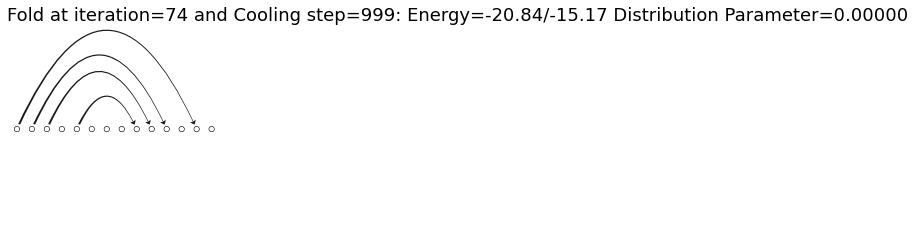

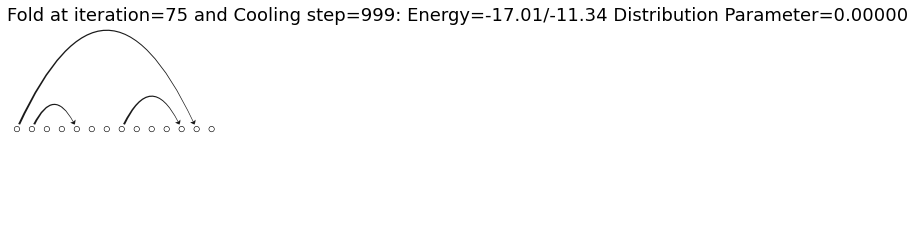

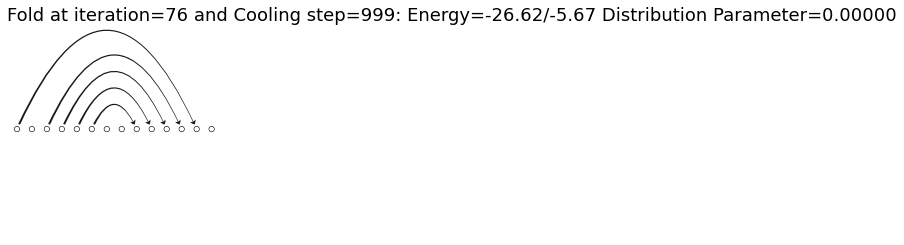

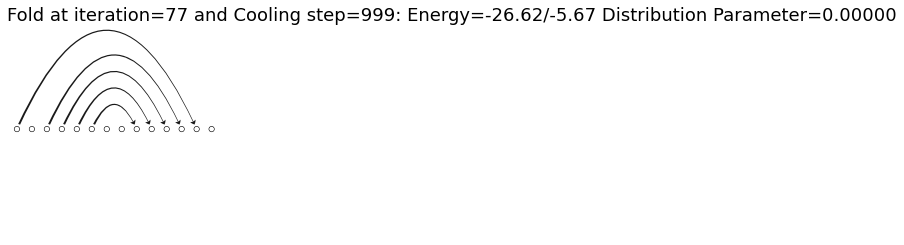

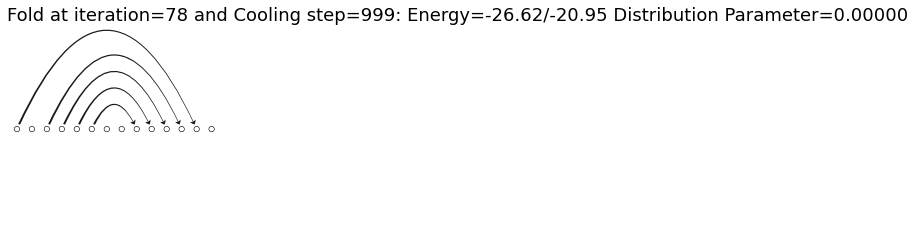

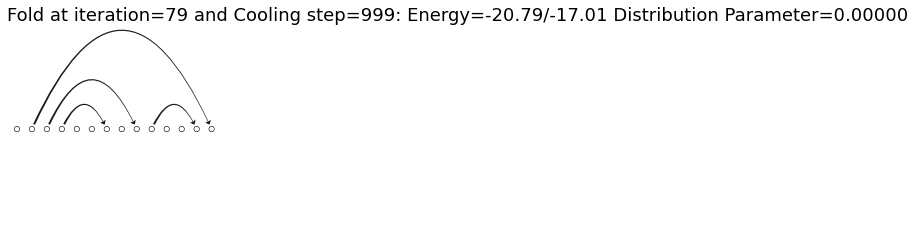

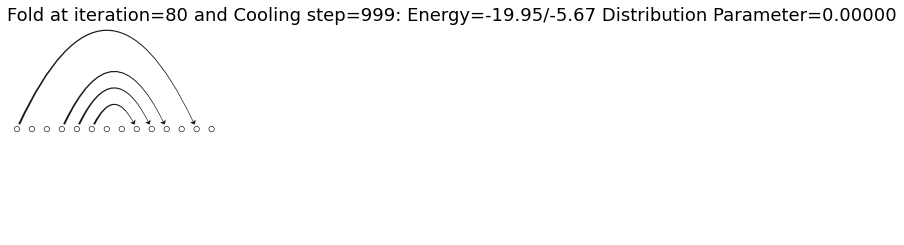

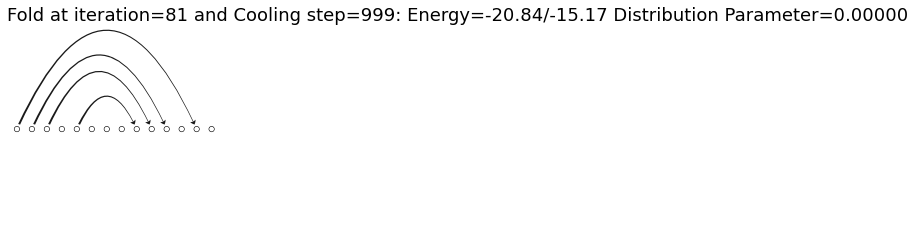

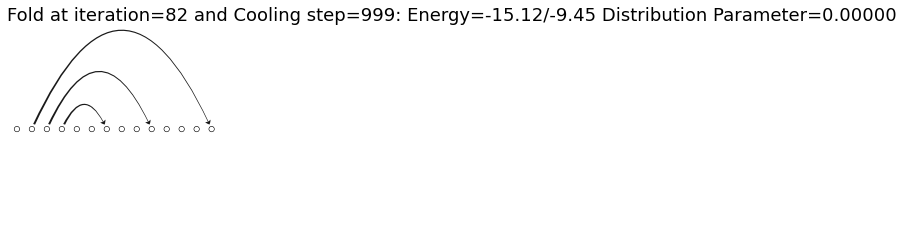

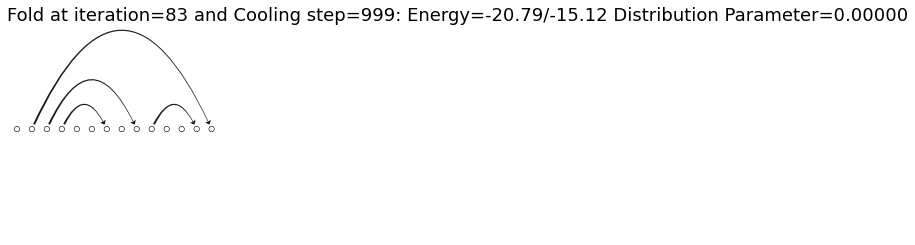

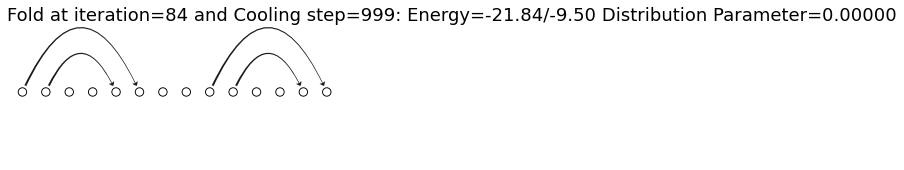

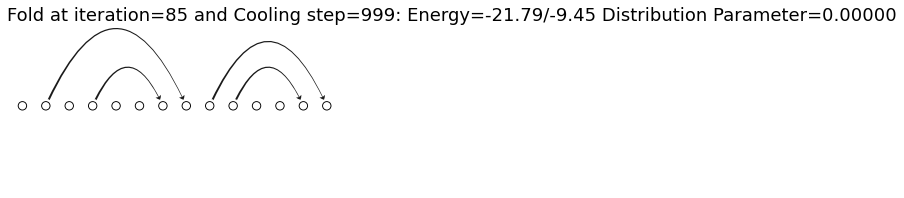

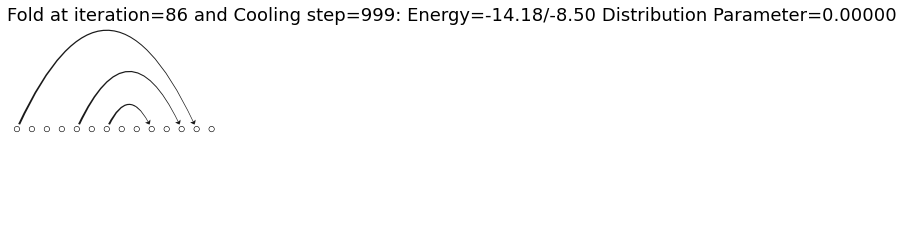

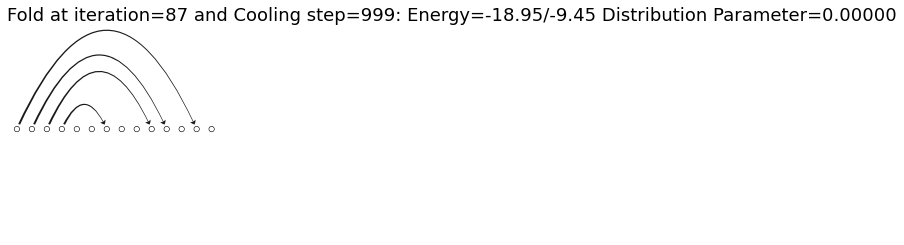

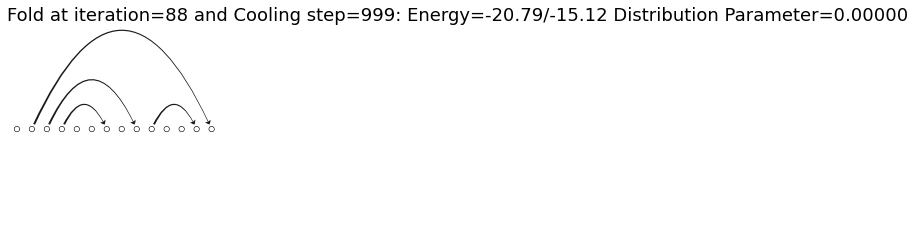

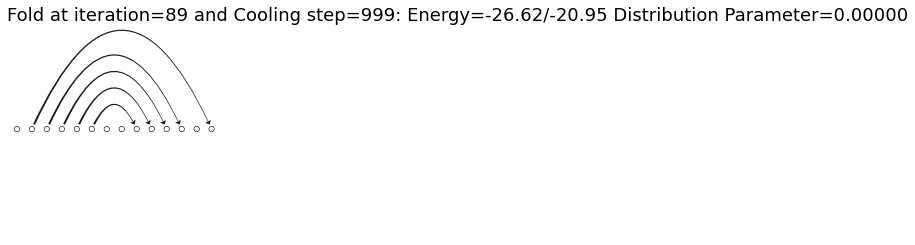

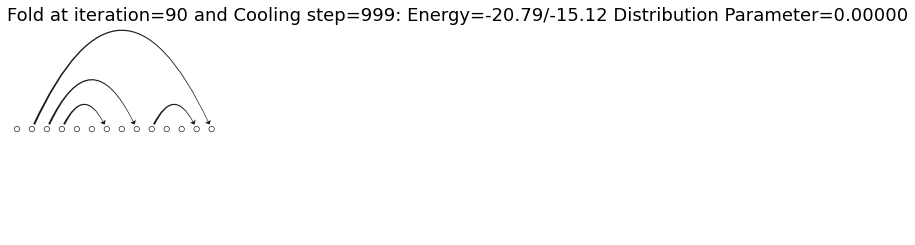

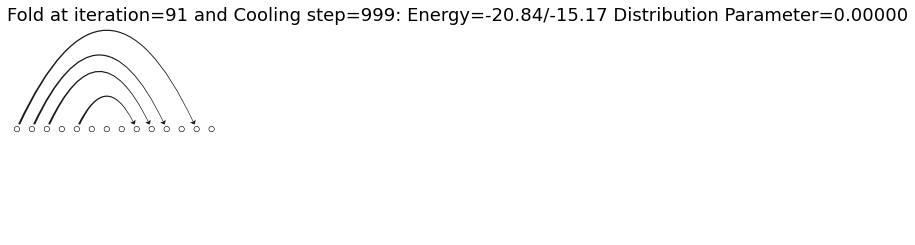

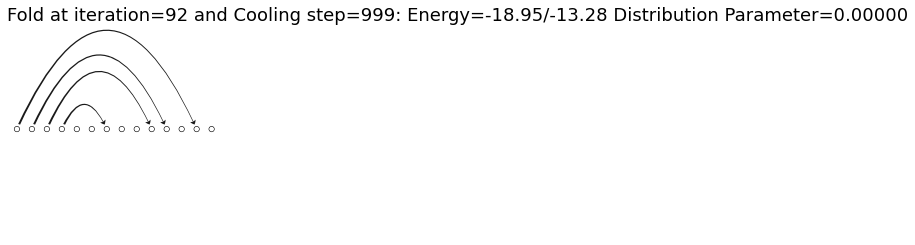

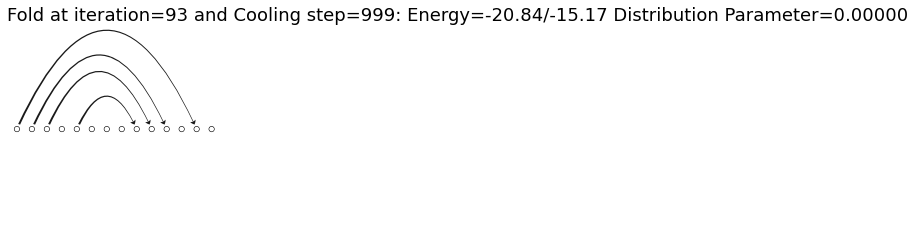

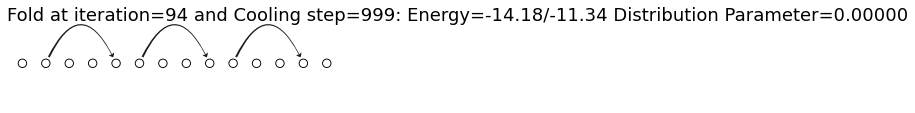

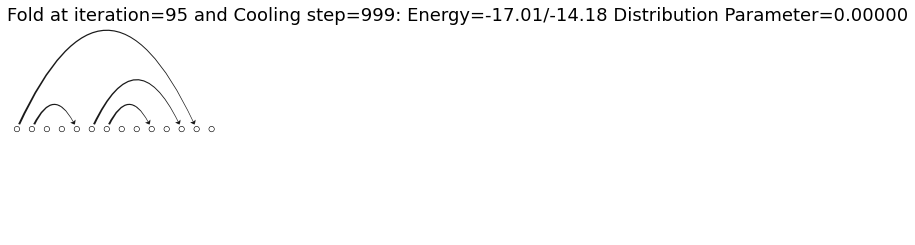

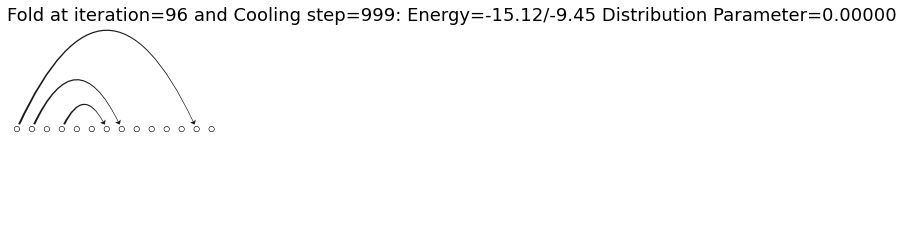

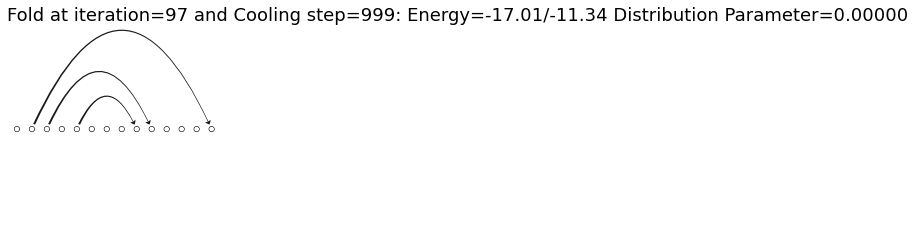

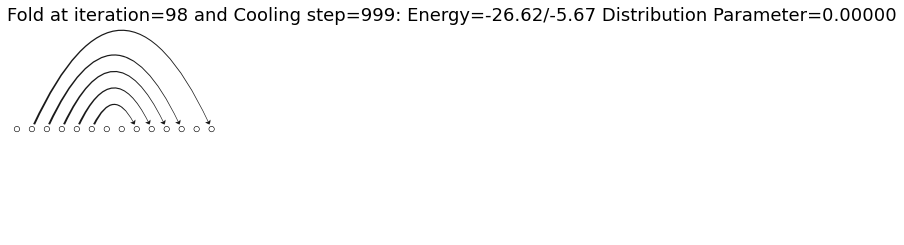

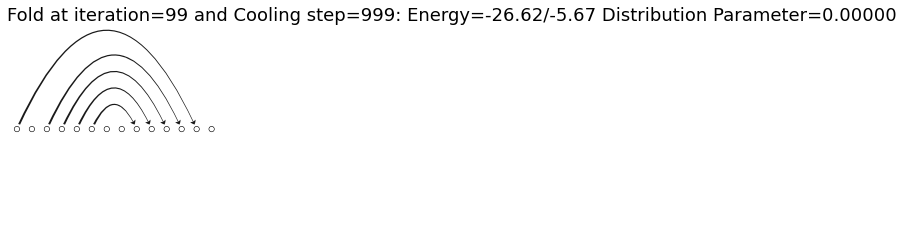

In [12]:
results['tetraloop'] = {}
results['tetraloop']['bp'], results['tetraloop']['ct'] = bp, ct = CT2basepair_matrix("2KOC.ct")
results['tetraloop']['states'] = simulated_annealing(initial_state = initialize_RNA(sequence = 'GGCACUUCGGUGCC', G_HB = -1.89, G_stack = -1.0),
                    iterations=100,
                    cooling_rate = 0.95,
                    cooling_steps = 1000,
                    equilibration_steps = 20,
                    distribution_parameter = 10.0,
                    temperature = 300*0.001985875,
                    debug=False,                     
                    system = "RNA")

## P2a-J2a/b-P2b of human telomerase RNA

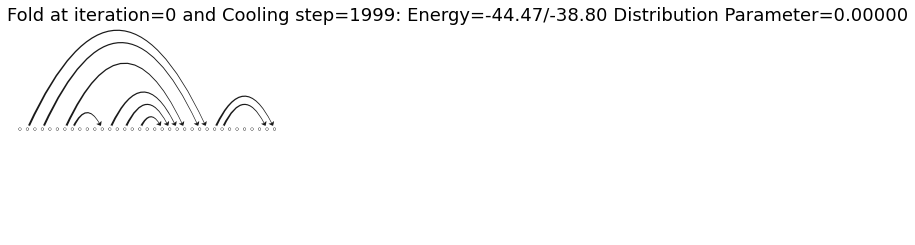

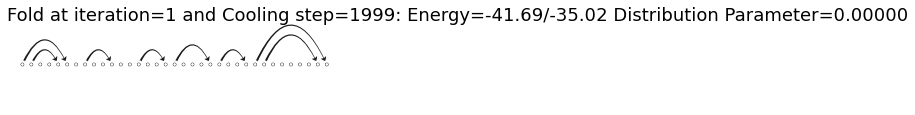

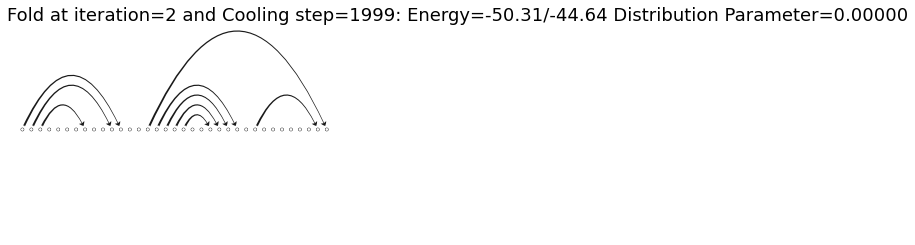

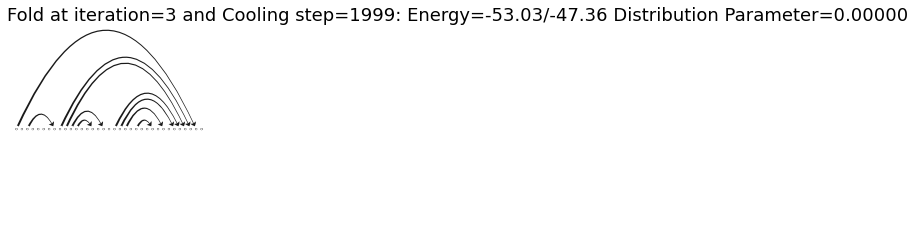

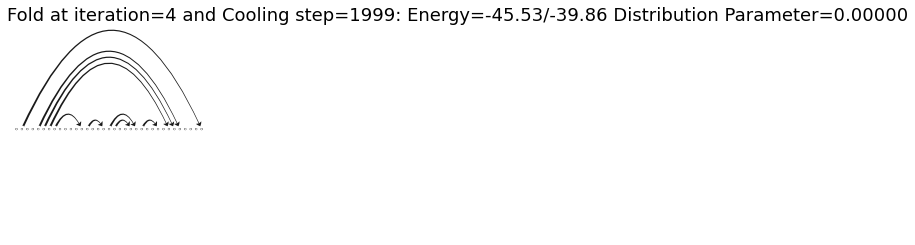

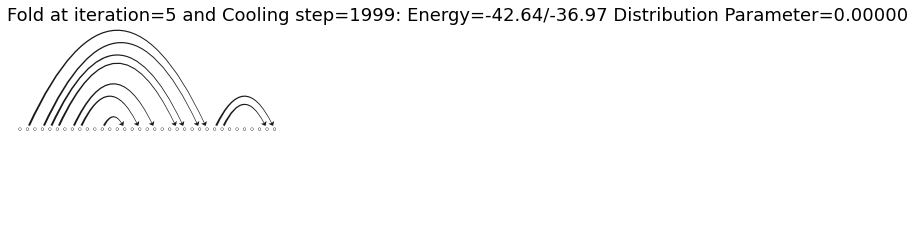

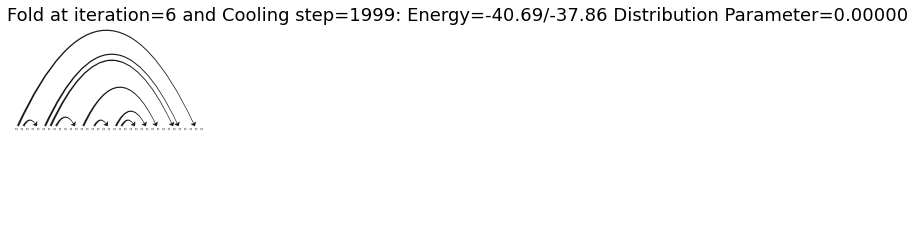

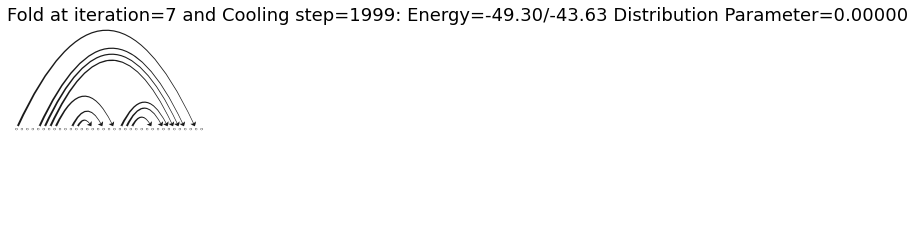

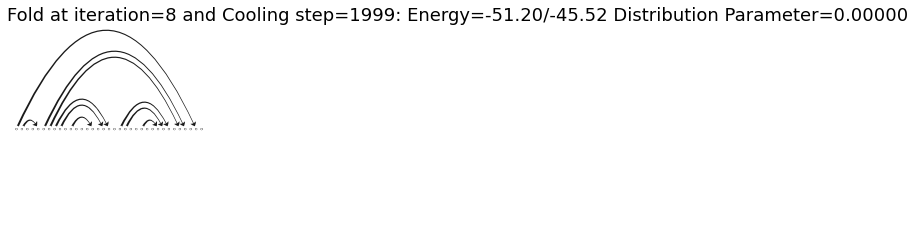

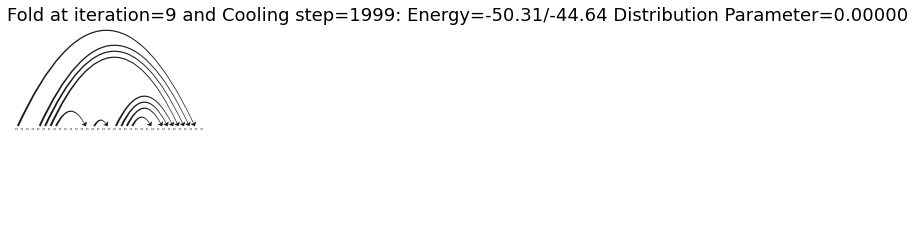

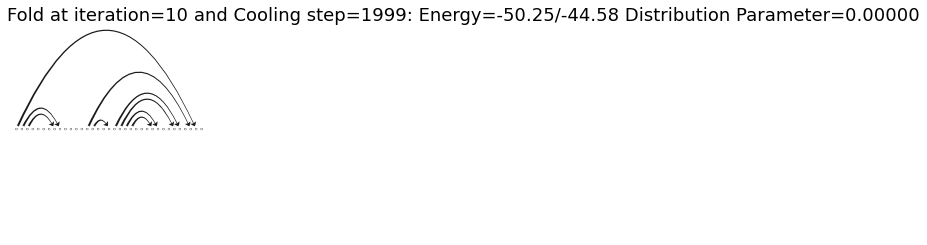

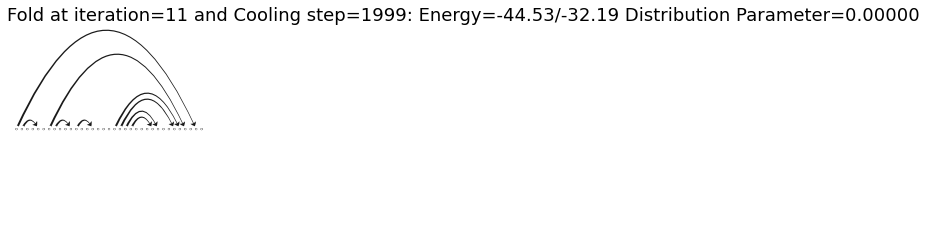

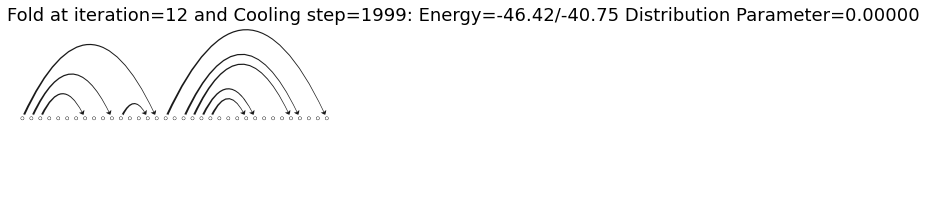

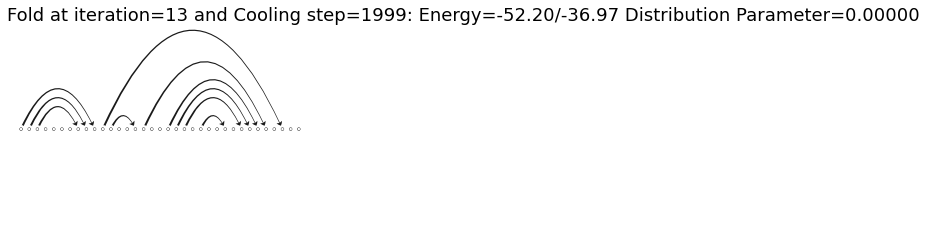

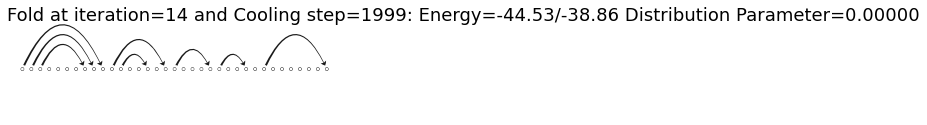

In [ ]:
results['telomerase'] = {}
results['telomerase']['bp'], results['tetraloop']['ct'] = bp, ct = CT2basepair_matrix("2L3E.ct")
results['telomerase']['states'] = simulated_annealing(initial_state = initialize_RNA(sequence = 'GGCUUUUGCUCCCCGUGCUUCGGCACGGAAAAGCC', G_HB = -1.89, G_stack = -1.0),
                    iterations=100,
                    cooling_rate = 0.95,
                    cooling_steps = 2000,
                    equilibration_steps = 20,
                    distribution_parameter = 10.0,
                    temperature = 300*0.001985875,
                    debug=False,                     
                    system = "RNA")

## Answers

### Visualizating Average Base-pairs

#### Defining functions to compute base-pair from the list of states

In [ ]:
def states2averaged_base_matrix(states):
    """ Generates averaged base-paired matrix for list of states """
    bp_matrix = None
    nstates = len(states)
    for i in range(nstates):
        state = states[i]
        tmp = stem2basepair_matrix(state['sequence'], state['assembled_stems'], state['stems_s1'], state['stems_s2'])
        if bp_matrix is None:
            bp_matrix = tmp
        else:
            bp_matrix += tmp
    return(bp_matrix/nstates)
 

In [ ]:
results['tetraloop']['bp']

#### Tetraloop

In [ ]:
visualize_structure(states2averaged_base_matrix(results['tetraloop']['states']), label = "Average")
visualize_structure(results['tetraloop']['bp'], label = "Acutal")

#### Telomerase

In [ ]:
visualize_structure(states2averaged_base_matrix(results['telomerase']['states']), label = "Average")
visualize_structure(results['telomerase']['bp'], label = "Acutal")